In [1]:
%run -n main.py
%matplotlib inline

In [176]:
%run -n main.py
# history = list(load_raw_lastfm_tracks())
# dump_lastfm_tracks(history)
history = load_lastfm_tracks()

In [3]:
%run -n main.py
# serps = load_echonest_serps(tracks)
# dump_echonest_serps(serps)
serps = load_echonest_serps()

In [241]:
%run -n main.py
releases = load_musicbrainz_releases()

In [240]:
%run -n main.py
tracks = list(filter_tracks_by_listened(join_lastfm_echonest(history, serps, releases)))

Достаточно стабильное число прослушиваний за 5 лет. С 2015 как будто упало

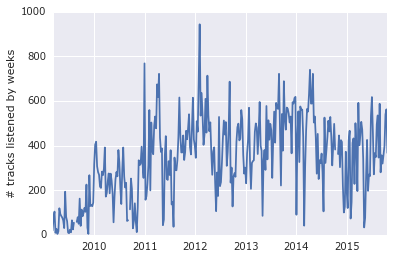

In [59]:
%run -n main.py
show_tracks_by_time(tracks)

# Ностальгия

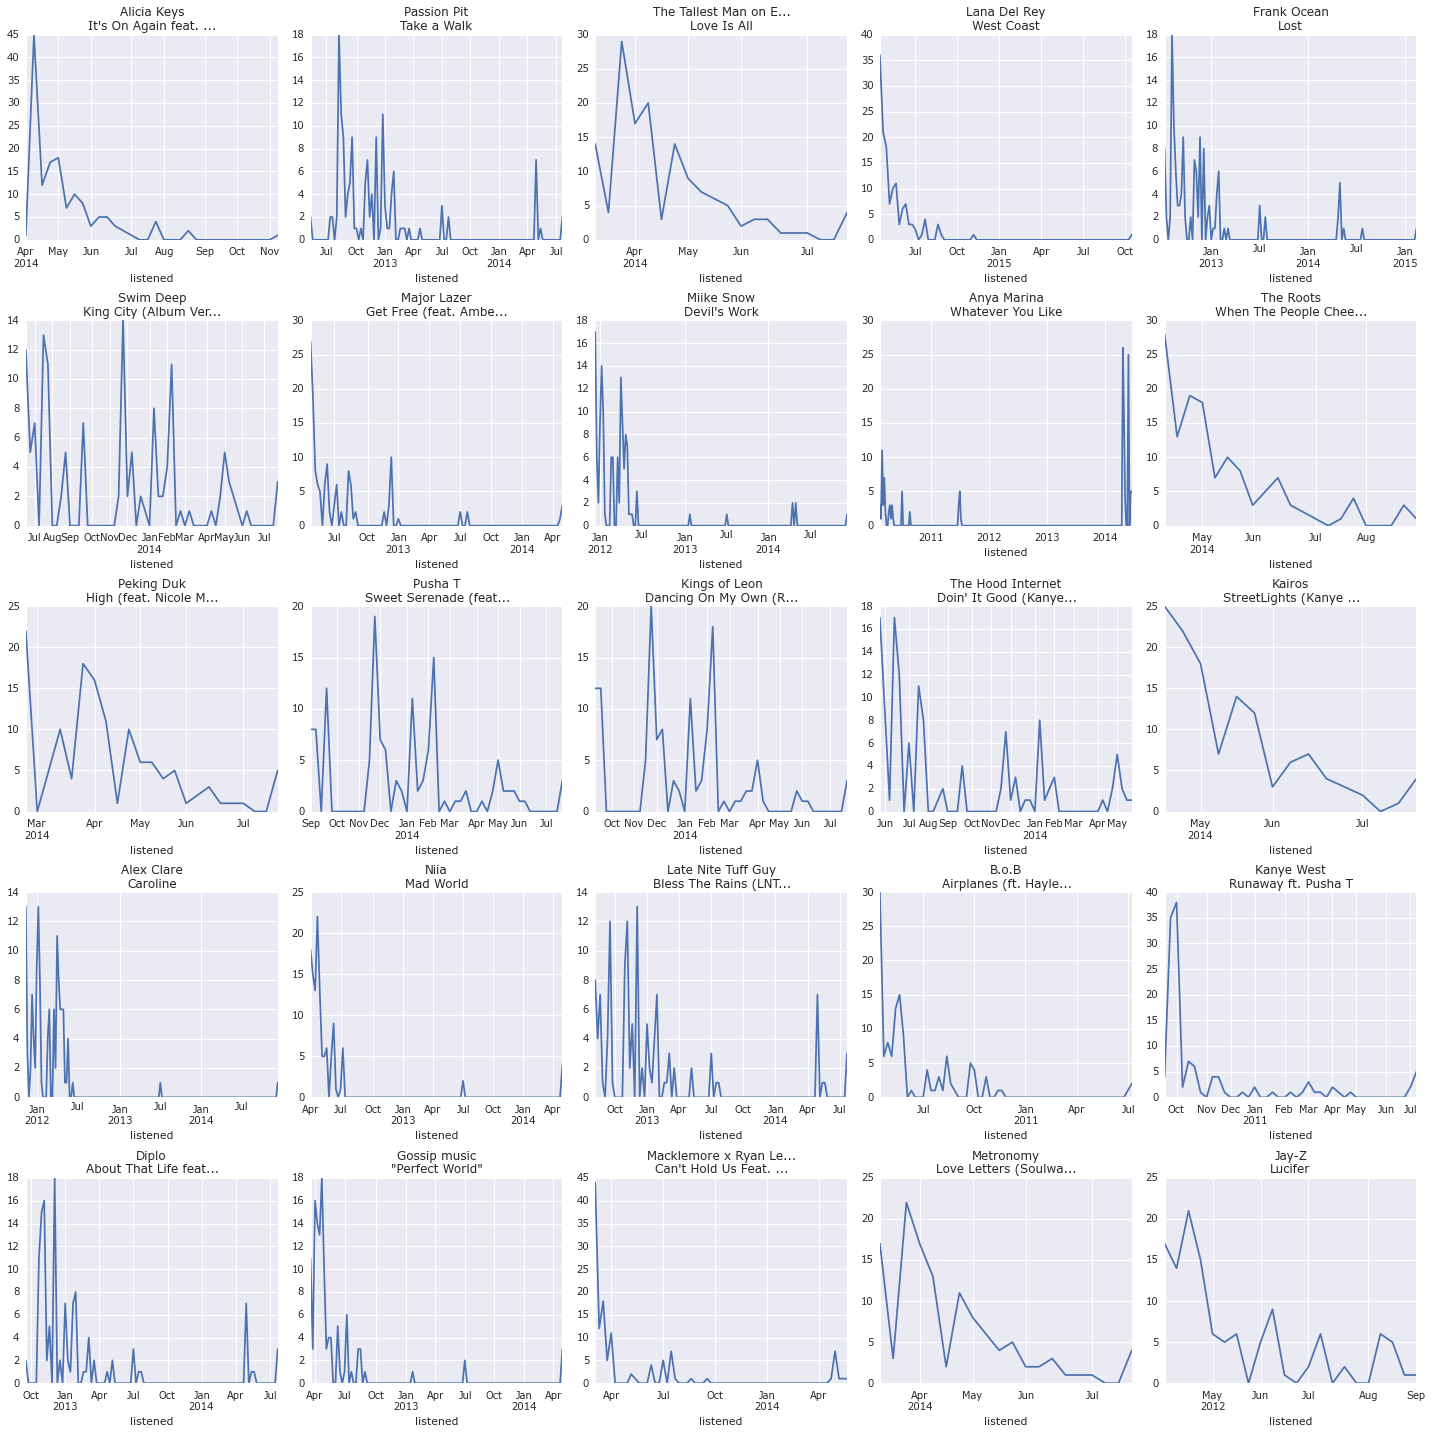

In [70]:
%run -n main.py
top_artist_tracks = islice(get_top_artist_tracks(tracks), 25, 50)
slice = list(filter_tracks_by_artist_track(tracks, top_artist_tracks))
show_tracks_by_artist_track_by_time(slice)

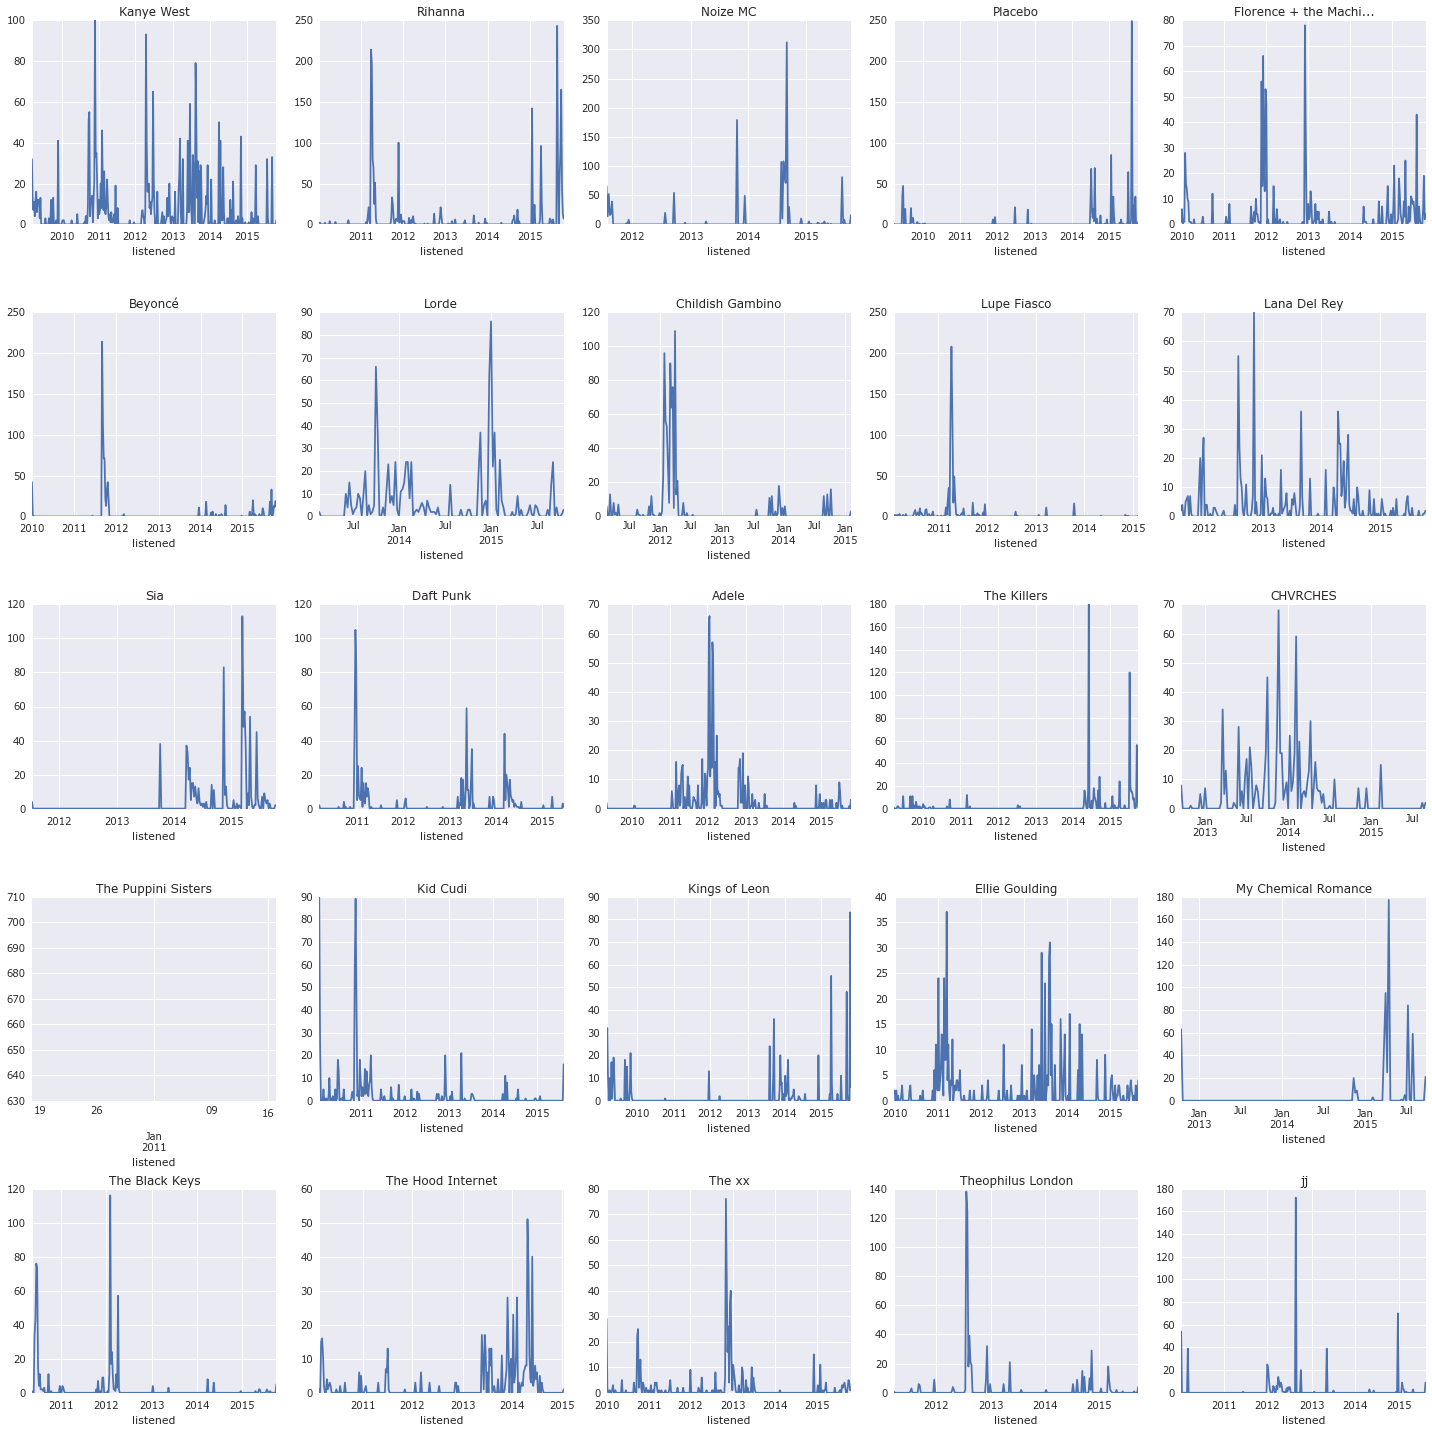

In [41]:
%run -n main.py
top_artists = islice(get_top_artists(tracks), 0, 25)
slice = list(filter_tracks_by_artists(tracks, top_artists))
show_tracks_by_artist_by_time(slice)

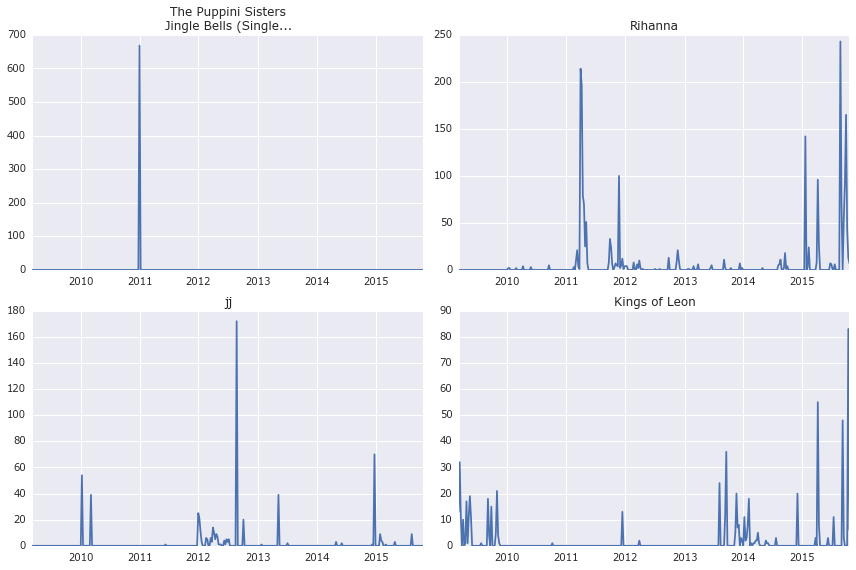

In [89]:
%run -n main.py
artist_tracks_selection = [
    ArtistTrack('The Puppini Sisters', 'Jingle Bells (Single Version)') 
]
artists_selection = [
    'Rihanna',
    'jj',
    'Kings of Leon'
]
show_selected_tracks_artists(tracks, artist_tracks_selection, artists_selection, rows=2, columns=2, width=12, height=8)

# Залипание

## Песни и исполнители, которых уже слушал

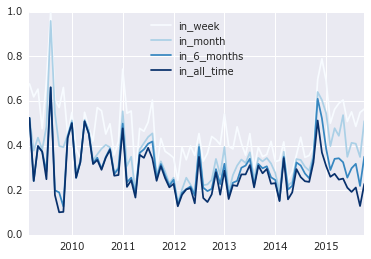

In [133]:
%run -n main.py
show_day_first_times(tracks)

Музыка не добавила новых исполнителей , но добавила исполнителей которых я не слушал полгода

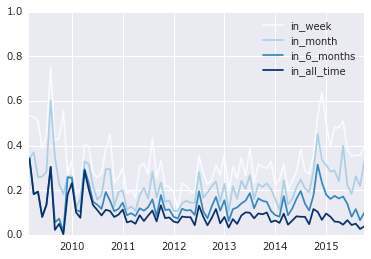

In [134]:
%run -n main.py
show_day_first_times(tracks, get_name=lambda _: _.artist.name)

## Треки на повторе

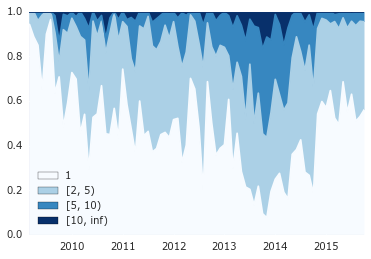

In [167]:
%run -n main.py
show_day_listen_repetitions(tracks)

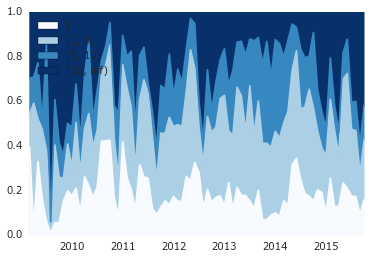

In [168]:
%run -n main.py
show_day_listen_repetitions(tracks, get_name=lambda _: _.artist.name)

## Попробуем скачать год выпуска треков

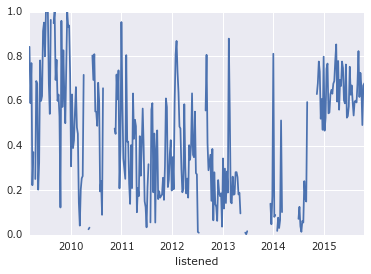

In [242]:
%run -n main.py
show_year_coverage_by_time(tracks)

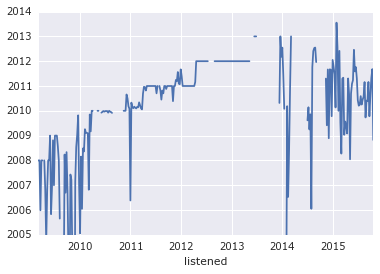

In [243]:
%run -n main.py
show_album_year_by_time(tracks)

# Echonest

С 2015 90% находится, до этого ~65%.

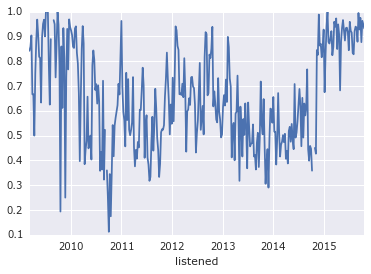

In [185]:
%run -n main.py
show_echonest_coverage_by_time(tracks)

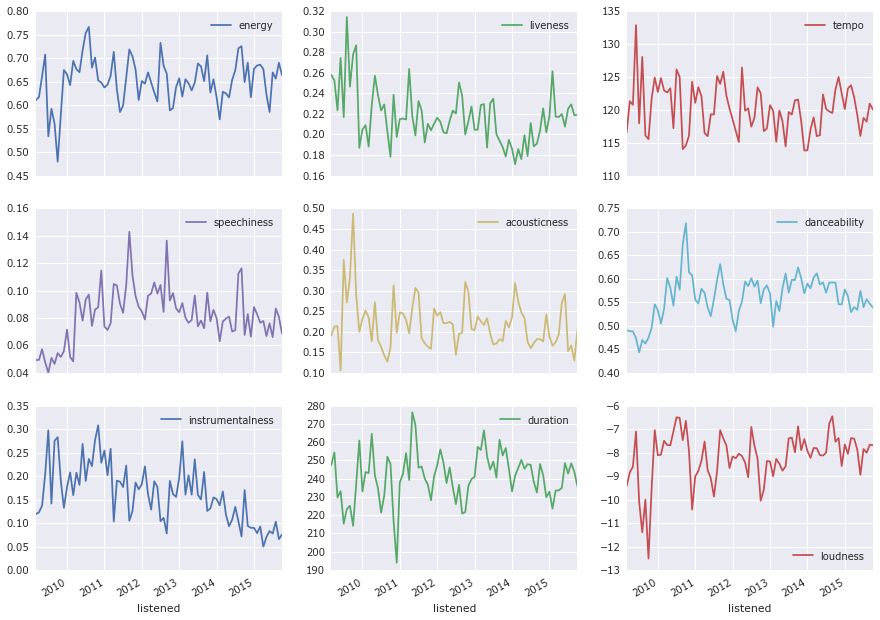

In [246]:
%run -n main.py
show_audio_by_time(tracks)

- liveness 0.08 jj My Life https://www.youtube.com/watch?v=wOhee8dUzWM
- liveness 0.92 Alicia Keys Girl on Fire http://www.youtube.com/watch?v=J91ti_MpdHA
- liveness 0.85 K-OS I Wish I Knew Natalie Portman http://www.youtube.com/watch?v=0UarWZqSgW0

- speechiness 0.02 Arcade Fire Joan of Arc https://www.youtube.com/watch?v=gfZCYDX4gEw
- speechiness 0.02 Lorde 400 Lux http://www.youtube.com/watch?v=cWGQduke0tc
- speechiness 0.92 Banks Drowning https://www.youtube.com/watch?v=HzGHgQBPyV0 
- speechiness 0.92 Feist Graveyard http://www.youtube.com/watch?v=KbnHmFKxPgA

- danceability 0.09 MGMT I Found a Whistle http://www.youtube.com/watch?v=IRIQyGgkkDg
- danceability 0.91 Frank Ocean Lost
- danceability 0.80 Metronomy Love Letters http://www.youtube.com/watch?v=riEBi8BJ9Tw

- instrumentalness 0.98 Daft Punk Arena http://www.youtube.com/watch?v=6H8u11KU-Ds
- instrumentalness 0.94 Röyksopp Keyboard Milk http://www.youtube.com/watch?v=dF8ojPeSo3s
- instrumentalness 0.02 CHVRCHES Lies http://www.youtube.com/watch?v=81RqEnvczV8
- instrumentalness 0.0003 The Tallest Man on Earth Love Is All https://www.youtube.com/watch?v=_BsZt_3MifU

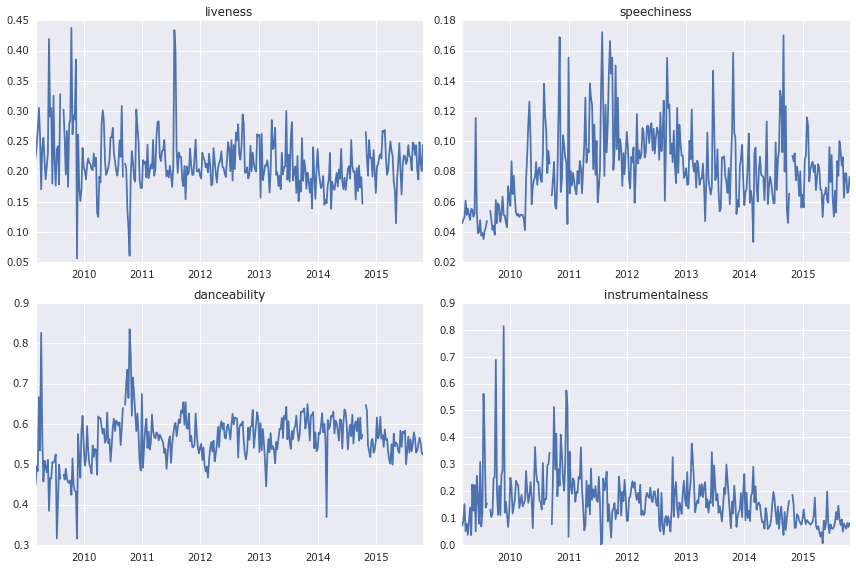

In [250]:
%run -n main.py
show_selected_tracks_audio_by_time(tracks)

# Обложки

In [ ]:
%run -n main.py
for url in islice(get_top_cover_urls(tracks), 25, 100):
    download_cover(url)

In [290]:
%run -n main.py
build_covers_grid(rows=6, columns=12)